   ID  SepalLength  SepalWidth  PetalLength  PetalWidth      Species
0   1          5.1         3.5          1.4         0.2  Iris-setosa
1   2          4.9         3.0          1.4         0.2  Iris-setosa
2   3          4.7         3.2          1.3         0.2  Iris-setosa
3   4          4.6         3.1          1.5         0.2  Iris-setosa
4   5          5.0         3.6          1.4         0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           150 non-null    int64  
 1   SepalLength  150 non-null    float64
 2   SepalWidth   150 non-null    float64
 3   PetalLength  150 non-null    float64
 4   PetalWidth   150 non-null    float64
 5   Species      150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

Accuracy: 0.9777777777777777

Classification Report:
                  precisi

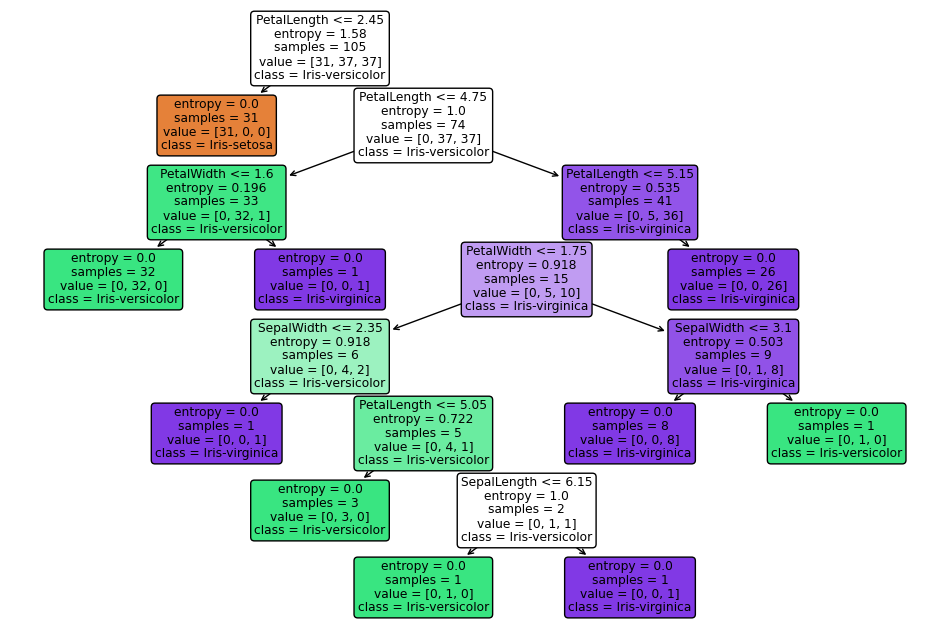

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load dataset
dataset = pd.read_csv("iris.csv")

# Rename columns correctly (6 total)
dataset.columns = ["ID", "SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Species"]

print(dataset.head())
print(dataset.info())

# Features and Target (skip ID column)
X = dataset.iloc[:, 1:-1]    # Exclude ID, take only features
y = dataset["Species"]

# Encode target
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree model
clf = DecisionTreeClassifier(criterion="entropy", random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Visualize tree
plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=X.columns, class_names=label_encoder.classes_, filled=True, rounded=True)
plt.show()
